# Effective spread
## Ana Sofía Hinojosa Bale

Using Roll's model for effective spreads, do the following using the `aapl_5m_train.csv` dataset:

- Determine the effective spread using the block method `cov([dt1, dt2, dt3], [dt4, dt5, dt6])`
- Determine the effective spread using the serial covariance `cov([dt1, dt2, dt3], [dt2, dt3, dt4])`
- Infer the last operation type
- Calculate the Bid & Ask price using a window size of [5, 10, 20, 50, 100]
- Find the average spread of AAPL and analyze the spreads of all methods to find which one fits best for this time series
- Upload a jupyter notebook with the results

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Datos

In [15]:
data = pd.read_csv('aapl_5m_train.csv').drop(columns = ['Unnamed: 0', 'Timestamp', 'Gmtoffset', 'Volume'])
data['Difference'] = data['Close'].diff()
data = data.dropna().reset_index(drop=True)

ba = []
for i in data['Difference']:
    if i > 0: 
        ba.append('ask')
    else:
        ba.append('bid')
data['BA'] = ba

data_block = data.copy()
data_cov = data.copy()
data

,Datetime,Open,High,Low,Close,Difference,BA
0,2021-01-04 14:35:00,132.750000,132.750000,131.809997,131.889999,-0.919998,bid
1,2021-01-04 14:40:00,131.500000,132.339996,131.500000,132.059997,0.169998,ask
2,2021-01-04 14:45:00,132.000000,132.250000,131.899993,132.250000,0.190003,ask
3,2021-01-04 14:50:00,132.000000,132.018096,131.520004,131.589996,-0.660004,bid
4,2021-01-04 14:55:00,132.000000,132.089996,131.300003,131.448898,-0.141098,bid
...,...,...,...,...,...,...,...
39567,2022-12-30 20:40:00,129.029998,129.130004,128.919998,129.054992,0.014999,ask
39568,2022-12-30 20:45:00,129.059997,129.399993,129.020004,129.380004,0.325012,ask
39569,2022-12-30 20:50:00,129.375000,129.929992,129.330001,129.764404,0.384400,ask
39570,2022-12-30 20:55:00,129.764999,129.949996,129.619995,129.949996,0.185592,ask


## Block method

In [19]:
def block_method(data, window):
    
    for w in window:
        diffs = data['Difference'].values
        cov = [np.nan] * len(data)
        n = len(data) - 2 * w - 1

        for i in range(n):
            b1 = diffs[i:i+w]
            b2 = diffs[i+w:i+2*w]

            cov[i + 2*w - 1] = np.abs(np.cov(b1, b2)[0, 1])

        data[f'Cov_{w}'] = cov
        data[f'Spread_{w}'] = 2 * np.sqrt(data[f'Cov_{w}'])

    for i in range(len(window)):
        data[f'Bid_{window[i]}'] = np.where(data['Difference'] > 0, 
            data['Close'] - data[f'Spread_{window[i]}'], data['Close'])
        data[f'Ask_{window[i]}'] = np.where(data['Difference'] > 0, 
            data['Close'], data['Close'] + data[f'Spread_{window[i]}'])

    return data

In [20]:
window = [5, 10, 20, 50, 100]
block_method(data_block, window)

,Datetime,Open,High,Low,Close,Difference,BA,Cov_5,Spread_5,Cov_10,...,Bid_5,Ask_5,Bid_10,Ask_10,Bid_20,Ask_20,Bid_50,Ask_50,Bid_100,Ask_100
0,2021-01-04 14:35:00,132.750000,132.750000,131.809997,131.889999,-0.919998,bid,NaN,NaN,NaN,...,131.889999,NaN,131.889999,NaN,131.889999,NaN,131.889999,NaN,131.889999,NaN
1,2021-01-04 14:40:00,131.500000,132.339996,131.500000,132.059997,0.169998,ask,NaN,NaN,NaN,...,NaN,132.059997,NaN,132.059997,NaN,132.059997,NaN,132.059997,NaN,132.059997
2,2021-01-04 14:45:00,132.000000,132.250000,131.899993,132.250000,0.190003,ask,NaN,NaN,NaN,...,NaN,132.250000,NaN,132.250000,NaN,132.250000,NaN,132.250000,NaN,132.250000
3,2021-01-04 14:50:00,132.000000,132.018096,131.520004,131.589996,-0.660004,bid,NaN,NaN,NaN,...,131.589996,NaN,131.589996,NaN,131.589996,NaN,131.589996,NaN,131.589996,NaN
4,2021-01-04 14:55:00,132.000000,132.089996,131.300003,131.448898,-0.141098,bid,NaN,NaN,NaN,...,131.448898,NaN,131.448898,NaN,131.448898,NaN,131.448898,NaN,131.448898,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39567,2022-12-30 20:40:00,129.029998,129.130004,128.919998,129.054992,0.014999,ask,0.005183,0.143989,0.001034,...,128.911003,129.054992,128.990683,129.054992,128.968943,129.054992,129.008188,129.054992,128.854473,129.054992
39568,2022-12-30 20:45:00,129.059997,129.399993,129.020004,129.380004,0.325012,ask,0.010577,0.205689,0.000199,...,129.174315,129.380004,129.351767,129.380004,129.309047,129.380004,129.332813,129.380004,129.179958,129.380004
39569,2022-12-30 20:50:00,129.375000,129.929992,129.330001,129.764404,0.384400,ask,0.007774,0.176345,0.009258,...,129.588059,129.764404,129.571969,129.764404,129.655864,129.764404,129.727883,129.764404,129.561978,129.764404
39570,2022-12-30 20:55:00,129.764999,129.949996,129.619995,129.949996,0.185592,ask,NaN,NaN,NaN,...,NaN,129.949996,NaN,129.949996,NaN,129.949996,NaN,129.949996,NaN,129.949996


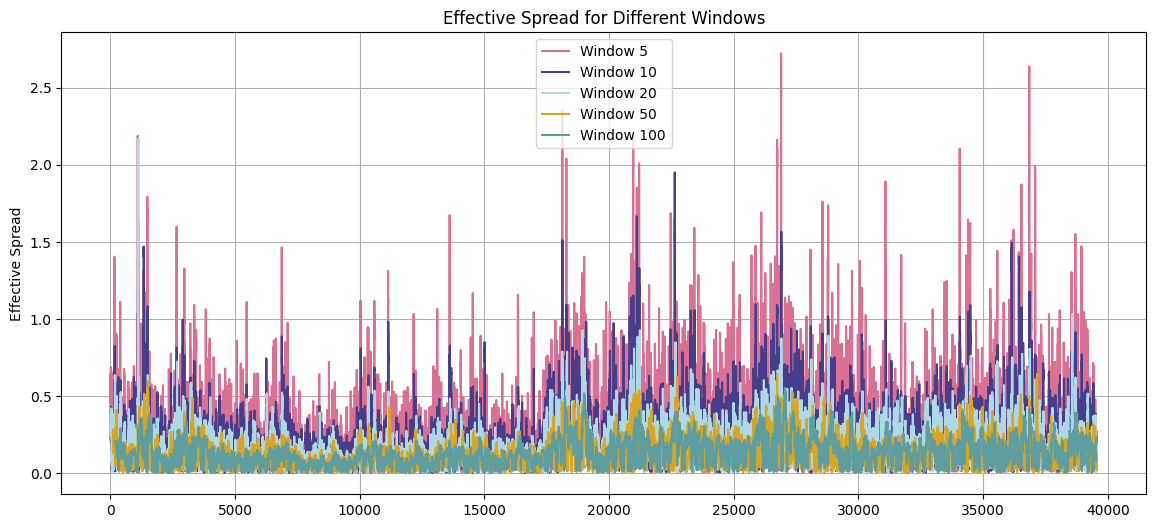

In [30]:
plt.figure(figsize=(14, 6))
colors = ['palevioletred', 'darkslateblue', 'lightblue', 'goldenrod', 'cadetblue']
for i, w in enumerate(window):
    plt.plot(data_block.index, data_block[f'Spread_{w}'], label=f'Window {w}', color=colors[i])

plt.title('Effective Spread for Different Windows')
plt.ylabel('Effective Spread')
plt.legend()
plt.grid()
plt.show()